In [319]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [320]:
import re
import numpy as np
import pandas as pd 
from konlpy.tag import Twitter

def trans(rowdata,kingname):
    rmhdata = []
    for num1 in range(len(rowdata)):
        for num in range(len(rowdata[num1])):
            #print(re.sub('[(一-龥)]','',rowdata[num]))
            rmhdata.append(re.sub('[(一-龥)]','',rowdata[num1][num]))
    wdata =[]
    for i in range(len(rmhdata)):
    #for j in range(len(rmhdata[i])):
        wdata.append(re.sub('-|○|/|。|】|【|=|\n','',rmhdata[i]))
    
    sdata =[]
    for i in range(len(wdata)):
    #for j in range(len(wdata[i])):
        if wdata[i] != '':
            sdata.append(wdata[i])
    ssdata =[]
    for i in range(len(sdata)):
        if re.search('[가-힣]+',sdata[i]):
            ssdata.append(sdata[i])
    data =[]
    for i in range(len(ssdata)):
        if kingname not in ssdata[i]:
            data.append(ssdata[i])

    return data

In [321]:
data =[]
for i in range(1,449):
    txt1 = open(f"선조  ({i}).txt",encoding = 'utf-8').readlines()
    date = []
    keywordtxt =[]
    for num,i in enumerate(txt1):
        if '선조실록' in i:
            if ('년'and '월' and '일') in i:
                date.append(num)

    for k in range(len(date)-1):
        count =0
        for j in range(date[k],date[k+1]):
            if '백성' in txt1[j]:
                count +=1
        if count >0:
            keywordtxt.append(txt1[date[k]:date[k+1]])
    data.append(trans(keywordtxt,'선조실록'))


In [322]:
len(data)

448

In [274]:

stopword = ["데","매우","더욱","또",'것','그','이','일','수','모두',
            '하니','때문','비록','대해','하라','어찌','우리','가지',
            '지금','반드시','다시','또한','수가','만약','감히','여러','먼저',
            '서로','여러','인하여','이러한','없던','있는','어찌',
            '년','월','일','실록','오히려','번째기사','하라',
           '입니다','있으셔야','입니다하니','마땅히','없습니다',
           '같았습니다','마땅히','오니','뿐이겠습니까','있으니',
            '바야흐로','이르렀기','있으면서','같습니다','실록','반드시',
           '있어','우리','있었던','같습니다','더하여','아름다','있었는데',
           '있겠는가','하소','있을'
           ]
def nd(data):
    tw = Twitter()
    noundata = []
    for i in range(len(data)):
        noun = tw.nouns(''.join(data[i]))
        nn =[]
        for j in noun:#
            if j not in stopword: # 불용어 지정 
                if len(j)>1:# 단어 두글자 이상
                    nn.append(j)
        noundata.append(nn)
        print(i,'번째 nouns 완료')
    return noundata
noundata = nd(data)

0 번째 nouns 완료
1 번째 nouns 완료
2 번째 nouns 완료
3 번째 nouns 완료
4 번째 nouns 완료
5 번째 nouns 완료
6 번째 nouns 완료
7 번째 nouns 완료
8 번째 nouns 완료
9 번째 nouns 완료
10 번째 nouns 완료
11 번째 nouns 완료
12 번째 nouns 완료
13 번째 nouns 완료
14 번째 nouns 완료
15 번째 nouns 완료
16 번째 nouns 완료
17 번째 nouns 완료
18 번째 nouns 완료
19 번째 nouns 완료
20 번째 nouns 완료
21 번째 nouns 완료
22 번째 nouns 완료
23 번째 nouns 완료
24 번째 nouns 완료
25 번째 nouns 완료
26 번째 nouns 완료
27 번째 nouns 완료
28 번째 nouns 완료
29 번째 nouns 완료
30 번째 nouns 완료
31 번째 nouns 완료
32 번째 nouns 완료
33 번째 nouns 완료
34 번째 nouns 완료
35 번째 nouns 완료
36 번째 nouns 완료
37 번째 nouns 완료
38 번째 nouns 완료
39 번째 nouns 완료
40 번째 nouns 완료
41 번째 nouns 완료
42 번째 nouns 완료
43 번째 nouns 완료
44 번째 nouns 완료
45 번째 nouns 완료
46 번째 nouns 완료
47 번째 nouns 완료
48 번째 nouns 완료
49 번째 nouns 완료
50 번째 nouns 완료
51 번째 nouns 완료
52 번째 nouns 완료
53 번째 nouns 완료
54 번째 nouns 완료
55 번째 nouns 완료
56 번째 nouns 완료
57 번째 nouns 완료
58 번째 nouns 완료
59 번째 nouns 완료
60 번째 nouns 완료
61 번째 nouns 완료
62 번째 nouns 완료
63 번째 nouns 완료
64 번째 nouns 완료
65 번째 nouns 완료
66 번째 nouns 완료
67 번째

In [330]:
nounsd =[]
for i in noundata:
    l =[]
    for j in i:
        if j not in stopword:
            l.append(j)
    nounsd.append(l)

In [331]:
from gensim import corpora
import gensim
dictionary = corpora.Dictionary(nounsd)
corpus = [dictionary.doc2bow(text) for text in nounsd]

NUM_TOPICS = 10 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.019*"사람" + 0.014*"백성" + 0.008*"나라" + 0.006*"상이"')
(1, '0.019*"사람" + 0.016*"상이" + 0.015*"영경" + 0.008*"나라"')
(2, '0.018*"백성" + 0.015*"사람" + 0.007*"상이" + 0.006*"고을"')
(3, '0.017*"상이" + 0.013*"군사" + 0.012*"사람" + 0.012*"나라"')
(4, '0.023*"상이" + 0.015*"사람" + 0.013*"나라" + 0.011*"군사"')
(5, '0.007*"파직" + 0.005*"백성" + 0.003*"폐단" + 0.003*"판관"')
(6, '0.028*"상이" + 0.021*"사람" + 0.010*"백성" + 0.007*"나라"')
(7, '0.022*"사람" + 0.011*"백성" + 0.010*"전하" + 0.010*"마음"')
(8, '0.013*"나라" + 0.012*"사람" + 0.008*"의논" + 0.007*"생각"')
(9, '0.013*"상이" + 0.012*"사람" + 0.008*"백성" + 0.007*"나라"')


In [332]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

# 왕의 행동과 말을 위주로 데이터를 뽑아본다. 그 논문을 기준으로 데이터 추출 
명하다, 하교하다, 전교하다,윤허하다, 허락하다 불허하다 허락하지 않았다 따르지 않았다 듣지 않았다 따르다 따랐다   
'는가' '인가' '이다' '느냐' '하라'  
'입니다' '합니다' '습니다' '아룁니다. 신하 says

In [4]:
kingword = ['명하다','명한다','전교하다','전교한다','윤허한다','윤허하다','허락하다','허락한다','허락하지 않았다',
           '허락하지 않는다','듣지 않았다','듣지 않는다','따랐다','따른다','는가','인가','이다','느냐','하라','전교','윤허','허락']
under = ['입니다', '합니다', '습니다', '아룁니다','니다','니까']

In [310]:
import re
def kingsword(data):
    kingsword =[]
    for j in range(len(data)):
        for num,i in enumerate(data[j]):
            if '윤허' in i:
                if len(i) < 35:
                    if '윤허하지 않' not in i:
                        #print(i)
                        if len(data[j][num-1])>=10:
                            kingsword.append(data[j][num-1])
                        elif len(data[j][num-1])<10 :
                            kingsword.append(data[j][num-2])
                        #print(data[j][num-1])
                elif len(i) >= 35:
                    kingsword.append(i)
    for j in range(len(data)):
        for num,i in enumerate(data[j]):
            if '전교' in i:
                if len(i) >= 25:
                    if '''"''' in i: # 말만
                        if '니다' not in i:
                            kingsword.append(i)
                        else:
                            kingsword.append(i)
                    else:
                        if "’" in i:
                            kingsword.extend(re.findall(r'\‘(.+?)\’',i))
                        elif len(i) < 180:
                            kingsword.append(i)

                elif len(i) < 25 :
                    kingsword.append(data[j][num-1])

    for j in range(len(data)):
        for num,i in enumerate(data[j]):
            if ' 명하' in i:
                if '니다' not in i:
                    kingsword.append(i)

    for j in range(len(data)):
        for num,i in enumerate(data[j]):
            if '허락하' in i:
                if '니다' not in i:                
                    kingsword.append(i)
            elif '허락하지 않' in i:
                if '니다' not in i:
                    kingsword.append(i)
    print(len(set(kingsword)))
    kingsword = list(set(kingsword))
    kings = []
    for i in range(len(kingsword)):
        kings.append(re.sub('''"|"''','',kingsword[i]))
    return kings

In [323]:
kings = kingsword(data)

1520


In [158]:
king = list(set(kingsword))

In [324]:
import re
kings = []
for i in range(len(king)):
    kings.append(re.sub('''"|"''','',king[i]))
len(kings)

1520

In [174]:
from konlpy.tag import Twitter

tw = Twitter()
kingn=tw.pos(' '.join(kings))

In [181]:
noun =[]
adj =[]
for t,p in kingn:
    if p == 'Noun':
        noun.append(t)
    elif p == 'Adjective':
        adj.append(t)
len(noun),len(adj)

(67417, 10086)

In [182]:
from collections import Counter
dictn ={}
for i in noun:
    if i not in dictn:
        dictn[i] = 1
    else:
        dictn[i] += 1
Counter(dictn).most_common()

[('것', 3130),
 ('수', 979),
 ('일', 795),
 ('그', 794),
 ('백성', 648),
 ('말', 620),
 ('이', 570),
 ('사람', 567),
 ('전교', 502),
 ('때', 419),
 ('모두', 407),
 ('명', 386),
 ('지금', 362),
 ('윤허', 350),
 ('뜻', 334),
 ('신들', 309),
 ('나라', 301),
 ('또', 272),
 ('어찌', 265),
 ('곳', 264),
 ('다시', 260),
 ('등', 249),
 ('매우', 242),
 ('우리', 238),
 ('생각', 237),
 ('때문', 223),
 ('감히', 220),
 ('중국', 194),
 ('의논', 194),
 ('반드시', 189),
 ('마음', 188),
 ('중', 186),
 ('적', 186),
 ('군사', 185),
 ('뒤', 184),
 ('데', 178),
 ('전', 175),
 ('듯', 175),
 ('시행', 174),
 ('못', 171),
 ('하라', 166),
 ('청', 162),
 ('죄', 160),
 ('알', 160),
 ('하니', 154),
 ('위', 153),
 ('더욱', 150),
 ('또한', 149),
 ('대해', 149),
 ('신', 149),
 ('폐단', 148),
 ('여러', 147),
 ('허락', 147),
 ('파직', 144),
 ('소서', 144),
 ('고', 144),
 ('가지', 143),
 ('고을', 143),
 ('안', 142),
 ('조정', 141),
 ('대신', 140),
 ('다만', 138),
 ('성상', 126),
 ('상', 124),
 ('염려', 121),
 ('관', 120),
 ('하소', 120),
 ('번', 120),
 ('자가', 118),
 ('함', 116),
 ('비록', 114),
 ('논', 113),
 ('행', 112),
 ('수가', 

In [328]:
stopword = ["데","매우","더욱","또",'것','그','이','일','수','모두',
            '하니','때문','비록','대해','하라','어찌','우리','가지',
            '지금','반드시','다시','또한','수가','만약','감히','여러','먼저',
            '서로','여러','인하여','이러한','없던','있는','어찌',
            '년','월','일','실록','오히려','번째기사','하라',
           '입니다','있으셔야','입니다하니','마땅히','없습니다',
           '같았습니다','마땅히','오니','뿐이겠습니까','있으니',
            '바야흐로','이르렀기','있으면서','같습니다','실록','반드시',
           '있어','우리','있었던','같습니다','더하여','아름다','있었는데',
           '있겠는가','하소','있을','윤허','전교','성상','사이','스스로','오늘날','일이','임금','말씀','소서','해조','다만','여기','다음','하나','대로','신들','참으로','실로','이제'
           ]

In [185]:
nounstop =[]
for i in noun:
    if i not in stopword:
        nounstop.append(i)

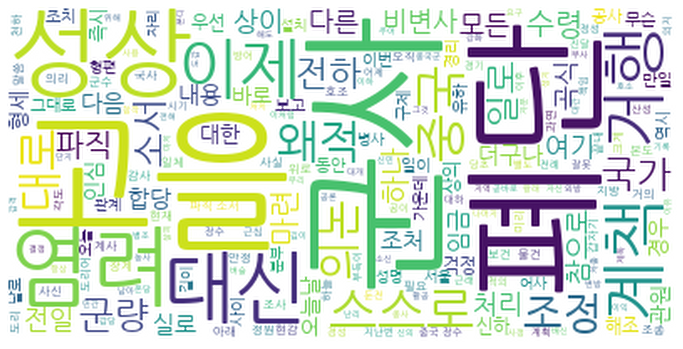

In [220]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
wordcloud = WordCloud(font_path='font/NanumGothic.ttf',stopwords=['다만','자가','조금','허락','백성','윤허','전교','사람','신들','생각','나라','시행','마음'], background_color='white').generate(' '.join(nounstop))
plt.figure(figsize=(12,12)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 


In [325]:
ldaking =[]
for i in kings:
    nn = tw.nouns(i)
    l=[]
    for j in nn:
        if j not in stopword:
            if len(j) > 1:
                l.append(j)
    ldaking.append(l)
len(ldaking)

1520

In [326]:
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import warnings
import time
import pyLDAvis.gensim

dictionary = corpora.Dictionary(ldaking)
corpus = [dictionary.doc2bow(text) for text in ldaking]

NUM_TOPICS = 10 
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=35,random_state=42)
topics = ldamodel.print_topics(num_words=6)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [309]:
for topic in topics:
    print(topic)

(0, '0.021*"사람" + 0.011*"군사" + 0.007*"백성" + 0.004*"시행" + 0.004*"병사" + 0.004*"조정"')
(1, '0.012*"백성" + 0.008*"처리" + 0.007*"비변사" + 0.007*"중국" + 0.006*"사람" + 0.006*"의논"')
(2, '0.017*"신들" + 0.010*"백성" + 0.008*"전하" + 0.007*"사람" + 0.006*"중국" + 0.005*"나라"')
(3, '0.012*"신들" + 0.011*"나라" + 0.010*"사람" + 0.007*"백성" + 0.006*"파직" + 0.006*"조종"')
(4, '0.014*"백성" + 0.009*"사람" + 0.007*"신들" + 0.006*"의논" + 0.006*"나라" + 0.005*"군사"')
(5, '0.018*"상이" + 0.015*"백성" + 0.011*"허락" + 0.010*"사람" + 0.009*"중국" + 0.006*"나라"')
(6, '0.015*"사람" + 0.010*"나라" + 0.008*"생각" + 0.008*"의논" + 0.007*"백성" + 0.006*"배신"')
(7, '0.025*"백성" + 0.013*"사람" + 0.010*"고을" + 0.007*"곡식" + 0.006*"생각" + 0.005*"시행"')
(8, '0.012*"나라" + 0.010*"사람" + 0.009*"마음" + 0.009*"생각" + 0.008*"백성" + 0.006*"왜적"')
(9, '0.011*"사람" + 0.009*"백성" + 0.009*"허락" + 0.007*"파직" + 0.006*"대신" + 0.006*"전하"')


In [300]:
nounstop

['주사',
 '내일',
 '분명',
 '출발',
 '형',
 '군',
 '문과',
 '진',
 '어사',
 '기복',
 '회지',
 '곧',
 '당',
 '것이므',
 '주사',
 '행차',
 '이정암',
 '배사',
 '상이',
 '황문',
 '명',
 '피구',
 '하사',
 '신들',
 '수첩',
 '관',
 '뜻',
 '성명',
 '우러러',
 '호소',
 '유음',
 '온',
 '나라',
 '백성',
 '머리',
 '신들',
 '경악',
 '모시',
 '뜻',
 '진달',
 '성명',
 '거조',
 '중지',
 '신민',
 '마음',
 '위로',
 '주소',
 '윤허',
 '서쪽',
 '백성',
 '영송',
 '운반',
 '힘',
 '변란',
 '난',
 '후',
 '국가',
 '의지',
 '지방',
 '백성',
 '힘',
 '이제',
 '중국',
 '군사',
 '철수',
 '백성',
 '가쁜',
 '숨',
 '비로소',
 '안정',
 '위로',
 '정사',
 '부역',
 '주거',
 '혹',
 '거행',
 '거나',
 '짐작',
 '의논',
 '처리',
 '정주',
 '목사',
 '우선',
 '이경준',
 '수해',
 '그로',
 '군사',
 '조련',
 '정예',
 '비책',
 '혹',
 '즉시',
 '방어',
 '사',
 '삼',
 '조항',
 '의논',
 '시행',
 '모든',
 '중',
 '방비',
 '감사',
 '병사',
 '전적',
 '만일',
 '어그러뜨리',
 '용서',
 '죄',
 '물',
 '것임',
 '미리',
 '칙',
 '시행',
 '신들',
 '적도',
 '다만',
 '적도',
 '무리',
 '산곡',
 '현재',
 '움직',
 '나라',
 '기미',
 '나라',
 '들보',
 '앞서',
 '군사',
 '기도',
 '전',
 '군량',
 '축낼',
 '걱정',
 '눈앞',
 '조발',
 '기회',
 '걱정',
 '우선',
 '본도',
 '수령',
 '해처',
 '방비',
 '케',
 '형세',
 '지역',
 '진영',
 '

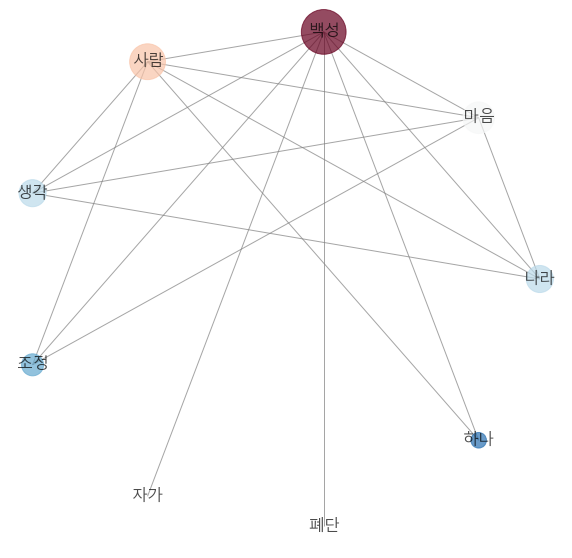

In [303]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

def apriori_result(word_list):
    te = TransactionEncoder()
    te_result = te.fit(word_list).transform(word_list)
    df = pd.DataFrame(te_result,columns=te.columns_)
    itemset = apriori(df, use_colnames=True)
    itemset['length']= itemset['itemsets'].apply(lambda x: len(x))
    itemset=itemset[itemset['length'] == 2]
    return itemset

itemset = apriori_result(noundata)

import networkx as nx
def network_g(itemset):
    G = nx.Graph()
    ar = (itemset['itemsets']);G.add_edges_from(ar)
    pr = nx.pagerank(G)
    nsize = np.array([v for v in pr.values()])
    nsize = 2000 *(nsize-min(nsize))/(max(nsize)-min(nsize))
#     pos = nx.planar_layout(G)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(10,10)); plt.axis('off')
    return nx.draw_networkx(G,font_size=16,
                pos=pos, node_color=list(pr.values()),node_size=nsize,font_family=font_name,
                alpha=0.7,edge_color='.5',cmap=plt.cm.RdBu_r)
network_g(itemset)

In [280]:
## 왜적 과 폐단
wdata =[]
for i in range(1,449):
    txt1 = open(f"선조  ({i}).txt",encoding = 'utf-8').readlines()
    date = []
    keywordtxt =[]
    for num,i in enumerate(txt1):
        if '선조실록' in i:
            if ('년'and '월' and '일') in i:
                date.append(num)

    for k in range(len(date)-1):
        count =0
        for j in range(date[k],date[k+1]):
            if '왜적' in txt1[j]:
                count +=1
        if count >0:
            keywordtxt.append(txt1[date[k]:date[k+1]])
    wdata.append(trans(keywordtxt,'선조실록'))


In [281]:
wnoundata= nd(wdata)

C:\Users\nyc15\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


0 번째 nouns 완료
1 번째 nouns 완료
2 번째 nouns 완료
3 번째 nouns 완료
4 번째 nouns 완료
5 번째 nouns 완료
6 번째 nouns 완료
7 번째 nouns 완료
8 번째 nouns 완료
9 번째 nouns 완료
10 번째 nouns 완료
11 번째 nouns 완료
12 번째 nouns 완료
13 번째 nouns 완료
14 번째 nouns 완료
15 번째 nouns 완료
16 번째 nouns 완료
17 번째 nouns 완료
18 번째 nouns 완료
19 번째 nouns 완료
20 번째 nouns 완료
21 번째 nouns 완료
22 번째 nouns 완료
23 번째 nouns 완료
24 번째 nouns 완료
25 번째 nouns 완료
26 번째 nouns 완료
27 번째 nouns 완료
28 번째 nouns 완료
29 번째 nouns 완료
30 번째 nouns 완료
31 번째 nouns 완료
32 번째 nouns 완료
33 번째 nouns 완료
34 번째 nouns 완료
35 번째 nouns 완료
36 번째 nouns 완료
37 번째 nouns 완료
38 번째 nouns 완료
39 번째 nouns 완료
40 번째 nouns 완료
41 번째 nouns 완료
42 번째 nouns 완료
43 번째 nouns 완료
44 번째 nouns 완료
45 번째 nouns 완료
46 번째 nouns 완료
47 번째 nouns 완료
48 번째 nouns 완료
49 번째 nouns 완료
50 번째 nouns 완료
51 번째 nouns 완료
52 번째 nouns 완료
53 번째 nouns 완료
54 번째 nouns 완료
55 번째 nouns 완료
56 번째 nouns 완료
57 번째 nouns 완료
58 번째 nouns 완료
59 번째 nouns 완료
60 번째 nouns 완료
61 번째 nouns 완료
62 번째 nouns 완료
63 번째 nouns 완료
64 번째 nouns 완료
65 번째 nouns 완료
66 번째 nouns 완료
67 번째

In [282]:
dictionary = corpora.Dictionary(wnoundata)
corpus = [dictionary.doc2bow(text) for text in wnoundata]

NUM_TOPICS = 10 
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=35,random_state=42)
topics = ldamodel.print_topics(num_words=6)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [283]:
for topic in topics:
    print(topic)

(0, '0.020*"사람" + 0.008*"나라" + 0.007*"왜적" + 0.006*"마음" + 0.005*"생각" + 0.005*"전하"')
(1, '0.015*"나라" + 0.013*"사람" + 0.011*"상이" + 0.011*"왜적" + 0.009*"중국" + 0.006*"군사"')
(2, '0.013*"국왕" + 0.013*"책봉" + 0.011*"조선" + 0.008*"광해군" + 0.008*"나라" + 0.007*"세자"')
(3, '0.009*"사람" + 0.005*"유희" + 0.005*"명분" + 0.004*"정인홍" + 0.004*"조짐" + 0.004*"선비"')
(4, '0.014*"나라" + 0.014*"사람" + 0.008*"의논" + 0.007*"유격" + 0.007*"중국" + 0.007*"자문"')
(5, '0.029*"왜적" + 0.013*"상이" + 0.012*"사람" + 0.010*"병사" + 0.008*"경리" + 0.006*"나라"')
(6, '0.017*"전하" + 0.013*"신들" + 0.013*"사람" + 0.012*"성상" + 0.010*"마음" + 0.009*"나라"')
(7, '0.015*"군사" + 0.013*"나라" + 0.013*"중국" + 0.011*"상이" + 0.010*"사람" + 0.010*"제독"')
(8, '0.020*"상이" + 0.017*"왜적" + 0.012*"군사" + 0.012*"사람" + 0.011*"나라" + 0.007*"중국"')
(9, '0.021*"상이" + 0.020*"사람" + 0.012*"나라" + 0.008*"중국" + 0.007*"군사" + 0.007*"왜적"')


In [306]:
itemset = apriori_result(wnoundata)
network_g(itemset) 

ValueError: min() arg is an empty sequence

In [284]:
wword = kingsword(wdata)

1062


In [285]:
wnword=nd(wword)

0 번째 nouns 완료
1 번째 nouns 완료
2 번째 nouns 완료
3 번째 nouns 완료
4 번째 nouns 완료
5 번째 nouns 완료
6 번째 nouns 완료
7 번째 nouns 완료


C:\Users\nyc15\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


8 번째 nouns 완료
9 번째 nouns 완료
10 번째 nouns 완료
11 번째 nouns 완료
12 번째 nouns 완료
13 번째 nouns 완료
14 번째 nouns 완료
15 번째 nouns 완료
16 번째 nouns 완료
17 번째 nouns 완료
18 번째 nouns 완료
19 번째 nouns 완료
20 번째 nouns 완료
21 번째 nouns 완료
22 번째 nouns 완료
23 번째 nouns 완료
24 번째 nouns 완료
25 번째 nouns 완료
26 번째 nouns 완료
27 번째 nouns 완료
28 번째 nouns 완료
29 번째 nouns 완료
30 번째 nouns 완료
31 번째 nouns 완료
32 번째 nouns 완료
33 번째 nouns 완료
34 번째 nouns 완료
35 번째 nouns 완료
36 번째 nouns 완료
37 번째 nouns 완료
38 번째 nouns 완료
39 번째 nouns 완료
40 번째 nouns 완료
41 번째 nouns 완료
42 번째 nouns 완료
43 번째 nouns 완료
44 번째 nouns 완료
45 번째 nouns 완료
46 번째 nouns 완료
47 번째 nouns 완료
48 번째 nouns 완료
49 번째 nouns 완료
50 번째 nouns 완료
51 번째 nouns 완료
52 번째 nouns 완료
53 번째 nouns 완료
54 번째 nouns 완료
55 번째 nouns 완료
56 번째 nouns 완료
57 번째 nouns 완료
58 번째 nouns 완료
59 번째 nouns 완료
60 번째 nouns 완료
61 번째 nouns 완료
62 번째 nouns 완료
63 번째 nouns 완료
64 번째 nouns 완료
65 번째 nouns 완료
66 번째 nouns 완료
67 번째 nouns 완료
68 번째 nouns 완료
69 번째 nouns 완료
70 번째 nouns 완료
71 번째 nouns 완료
72 번째 nouns 완료
73 번째 nouns 완료
74 번째 nouns 

531 번째 nouns 완료
532 번째 nouns 완료
533 번째 nouns 완료
534 번째 nouns 완료
535 번째 nouns 완료
536 번째 nouns 완료
537 번째 nouns 완료
538 번째 nouns 완료
539 번째 nouns 완료
540 번째 nouns 완료
541 번째 nouns 완료
542 번째 nouns 완료
543 번째 nouns 완료
544 번째 nouns 완료
545 번째 nouns 완료
546 번째 nouns 완료
547 번째 nouns 완료
548 번째 nouns 완료
549 번째 nouns 완료
550 번째 nouns 완료
551 번째 nouns 완료
552 번째 nouns 완료
553 번째 nouns 완료
554 번째 nouns 완료
555 번째 nouns 완료
556 번째 nouns 완료
557 번째 nouns 완료
558 번째 nouns 완료
559 번째 nouns 완료
560 번째 nouns 완료
561 번째 nouns 완료
562 번째 nouns 완료
563 번째 nouns 완료
564 번째 nouns 완료
565 번째 nouns 완료
566 번째 nouns 완료
567 번째 nouns 완료
568 번째 nouns 완료
569 번째 nouns 완료
570 번째 nouns 완료
571 번째 nouns 완료
572 번째 nouns 완료
573 번째 nouns 완료
574 번째 nouns 완료
575 번째 nouns 완료
576 번째 nouns 완료
577 번째 nouns 완료
578 번째 nouns 완료
579 번째 nouns 완료
580 번째 nouns 완료
581 번째 nouns 완료
582 번째 nouns 완료
583 번째 nouns 완료
584 번째 nouns 완료
585 번째 nouns 완료
586 번째 nouns 완료
587 번째 nouns 완료
588 번째 nouns 완료
589 번째 nouns 완료
590 번째 nouns 완료
591 번째 nouns 완료
592 번째 nouns 완료
593 번째 n

In [286]:
w = [' '.join(wnword[i]) for i in range(len(wnword))]

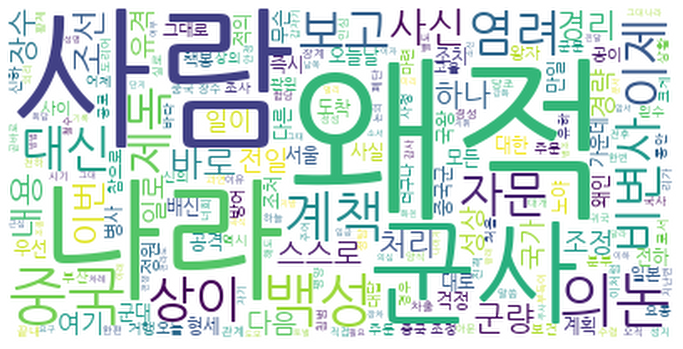

In [287]:
wordcloud = WordCloud(font_path='font/NanumGothic.ttf',stopwords=['다만','자가','조금','허락','신들','윤허','전교','생각','시행','마음'], background_color='white').generate(' '.join(w))
plt.figure(figsize=(12,12)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

In [288]:
pdata =[]
for i in range(1,449):
    txt1 = open(f"선조  ({i}).txt",encoding = 'utf-8').readlines()
    date = []
    keywordtxt =[]
    for num,i in enumerate(txt1):
        if '선조실록' in i:
            if ('년'and '월' and '일') in i:
                date.append(num)

    for k in range(len(date)-1):
        count =0
        for j in range(date[k],date[k+1]):
            if '폐단' in txt1[j]:
                count +=1
        if count >0:
            keywordtxt.append(txt1[date[k]:date[k+1]])
    pdata.append(trans(keywordtxt,'선조실록'))


In [289]:
pnoundata = nd(pdata)

0 번째 nouns 완료
1 번째 nouns 완료
2 번째 nouns 완료
3 번째 nouns 완료
4 번째 nouns 완료
5 번째 nouns 완료
6 번째 nouns 완료
7 번째 nouns 완료
8 번째 nouns 완료
9 번째 nouns 완료
10 번째 nouns 완료
11 번째 nouns 완료
12 번째 nouns 완료
13 번째 nouns 완료
14 번째 nouns 완료
15 번째 nouns 완료
16 번째 nouns 완료
17 번째 nouns 완료
18 번째 nouns 완료
19 번째 nouns 완료
20 번째 nouns 완료
21 번째 nouns 완료
22 번째 nouns 완료
23 번째 nouns 완료
24 번째 nouns 완료
25 번째 nouns 완료
26 번째 nouns 완료
27 번째 nouns 완료
28 번째 nouns 완료
29 번째 nouns 완료
30 번째 nouns 완료
31 번째 nouns 완료
32 번째 nouns 완료
33 번째 nouns 완료
34 번째 nouns 완료
35 번째 nouns 완료
36 번째 nouns 완료
37 번째 nouns 완료
38 번째 nouns 완료
39 번째 nouns 완료
40 번째 nouns 완료
41 번째 nouns 완료
42 번째 nouns 완료
43 번째 nouns 완료
44 번째 nouns 완료
45 번째 nouns 완료
46 번째 nouns 완료
47 번째 nouns 완료
48 번째 nouns 완료
49 번째 nouns 완료
50 번째 nouns 완료
51 번째 nouns 완료
52 번째 nouns 완료
53 번째 nouns 완료
54 번째 nouns 완료
55 번째 nouns 완료
56 번째 nouns 완료
57 번째 nouns 완료
58 번째 nouns 완료
59 번째 nouns 완료
60 번째 nouns 완료
61 번째 nouns 완료
62 번째 nouns 완료
63 번째 nouns 완료
64 번째 nouns 완료
65 번째 nouns 완료
66 번째 nouns 완료
67 번째

In [290]:
dictionary = corpora.Dictionary(pnoundata)
corpus = [dictionary.doc2bow(text) for text in pnoundata]

NUM_TOPICS = 10 
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=35,random_state=42)
topics = ldamodel.print_topics(num_words=6)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [291]:
for topic in topics:
    print(topic)

(0, '0.014*"사람" + 0.010*"폐단" + 0.007*"백성" + 0.005*"파직" + 0.004*"윤허" + 0.004*"대로"')
(1, '0.003*"김규" + 0.002*"허준" + 0.002*"의전" + 0.002*"주상" + 0.002*"소서" + 0.002*"하나"')
(2, '0.016*"사람" + 0.012*"백성" + 0.009*"폐단" + 0.009*"마음" + 0.008*"전하" + 0.007*"나라"')
(3, '0.013*"사람" + 0.013*"폐단" + 0.009*"의논" + 0.008*"백성" + 0.006*"전교" + 0.006*"나라"')
(4, '0.013*"사람" + 0.010*"상이" + 0.008*"폐단" + 0.006*"항복" + 0.006*"백성" + 0.005*"중국"')
(5, '0.017*"사람" + 0.010*"상이" + 0.008*"폐단" + 0.007*"백성" + 0.005*"나라" + 0.005*"시행"')
(6, '0.020*"사람" + 0.011*"임금" + 0.008*"기대승" + 0.007*"생각" + 0.006*"유희춘" + 0.006*"학문"')
(7, '0.016*"폐단" + 0.012*"사람" + 0.012*"파직" + 0.009*"소서" + 0.004*"윤허" + 0.004*"백성"')
(8, '0.010*"상이" + 0.009*"사람" + 0.008*"폐단" + 0.006*"파직" + 0.005*"신들" + 0.004*"사신"')
(9, '0.020*"사람" + 0.019*"상이" + 0.010*"나라" + 0.008*"군사" + 0.007*"중국" + 0.007*"폐단"')


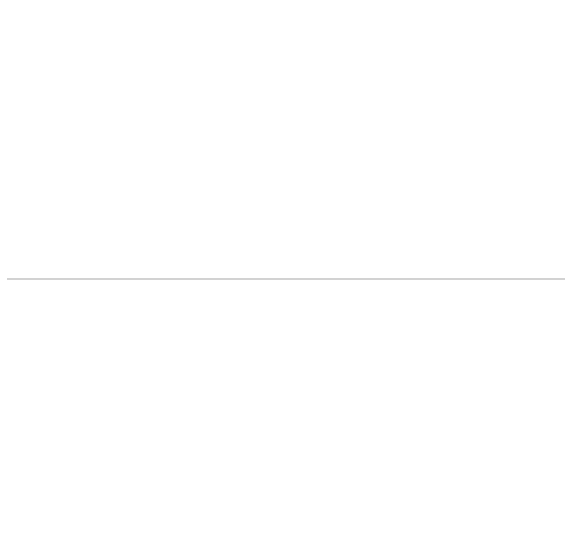

In [304]:
itemset = apriori_result(pnoundata)
network_g(itemset) # 읍넹

In [292]:
pword = kingsword(pdata)

1068


In [293]:
pnword=nd(pword)

0 번째 nouns 완료
1 번째 nouns 완료
2 번째 nouns 완료
3 번째 nouns 완료
4 번째 nouns 완료
5 번째 nouns 완료
6 번째 nouns 완료
7 번째 nouns 완료
8 번째 nouns 완료
9 번째 nouns 완료
10

C:\Users\nyc15\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


 번째 nouns 완료
11 번째 nouns 완료
12 번째 nouns 완료
13 번째 nouns 완료
14 번째 nouns 완료
15 번째 nouns 완료
16 번째 nouns 완료
17 번째 nouns 완료
18 번째 nouns 완료
19 번째 nouns 완료
20 번째 nouns 완료
21 번째 nouns 완료
22 번째 nouns 완료
23 번째 nouns 완료
24 번째 nouns 완료
25 번째 nouns 완료
26 번째 nouns 완료
27 번째 nouns 완료
28 번째 nouns 완료
29 번째 nouns 완료
30 번째 nouns 완료
31 번째 nouns 완료
32 번째 nouns 완료
33 번째 nouns 완료
34 번째 nouns 완료
35 번째 nouns 완료
36 번째 nouns 완료
37 번째 nouns 완료
38 번째 nouns 완료
39 번째 nouns 완료
40 번째 nouns 완료
41 번째 nouns 완료
42 번째 nouns 완료
43 번째 nouns 완료
44 번째 nouns 완료
45 번째 nouns 완료
46 번째 nouns 완료
47 번째 nouns 완료
48 번째 nouns 완료
49 번째 nouns 완료
50 번째 nouns 완료
51 번째 nouns 완료
52 번째 nouns 완료
53 번째 nouns 완료
54 번째 nouns 완료
55 번째 nouns 완료
56 번째 nouns 완료
57 번째 nouns 완료
58 번째 nouns 완료
59 번째 nouns 완료
60 번째 nouns 완료
61 번째 nouns 완료
62 번째 nouns 완료
63 번째 nouns 완료
64 번째 nouns 완료
65 번째 nouns 완료
66 번째 nouns 완료
67 번째 nouns 완료
68 번째 nouns 완료
69 번째 nouns 완료
70 번째 nouns 완료
71 번째 nouns 완료
72 번째 nouns 완료
73 번째 nouns 완료
74 번째 nouns 완료
75 번째 nouns 완료
76 번째 nouns 

539 번째 nouns 완료
540 번째 nouns 완료
541 번째 nouns 완료
542 번째 nouns 완료
543 번째 nouns 완료
544 번째 nouns 완료
545 번째 nouns 완료
546 번째 nouns 완료
547 번째 nouns 완료
548 번째 nouns 완료
549 번째 nouns 완료
550 번째 nouns 완료
551 번째 nouns 완료
552 번째 nouns 완료
553 번째 nouns 완료
554 번째 nouns 완료
555 번째 nouns 완료
556 번째 nouns 완료
557 번째 nouns 완료
558 번째 nouns 완료
559 번째 nouns 완료
560 번째 nouns 완료
561 번째 nouns 완료
562 번째 nouns 완료
563 번째 nouns 완료
564 번째 nouns 완료
565 번째 nouns 완료
566 번째 nouns 완료
567 번째 nouns 완료
568 번째 nouns 완료
569 번째 nouns 완료
570 번째 nouns 완료
571 번째 nouns 완료
572 번째 nouns 완료
573 번째 nouns 완료
574 번째 nouns 완료
575 번째 nouns 완료
576 번째 nouns 완료
577 번째 nouns 완료
578 번째 nouns 완료
579 번째 nouns 완료
580 번째 nouns 완료
581 번째 nouns 완료
582 번째 nouns 완료
583 번째 nouns 완료
584 번째 nouns 완료
585 번째 nouns 완료
586 번째 nouns 완료
587 번째 nouns 완료
588 번째 nouns 완료
589 번째 nouns 완료
590 번째 nouns 완료
591 번째 nouns 완료
592 번째 nouns 완료
593 번째 nouns 완료
594 번째 nouns 완료
595 번째 nouns 완료
596 번째 nouns 완료
597 번째 nouns 완료
598 번째 nouns 완료
599 번째 nouns 완료
600 번째 nouns 완료
601 번째 n

1065 번째 nouns 완료
1066 번째 nouns 완료
1067 번째 nouns 완료


In [294]:
p = [' '.join(pnword[i]) for i in range(len(pnword))]

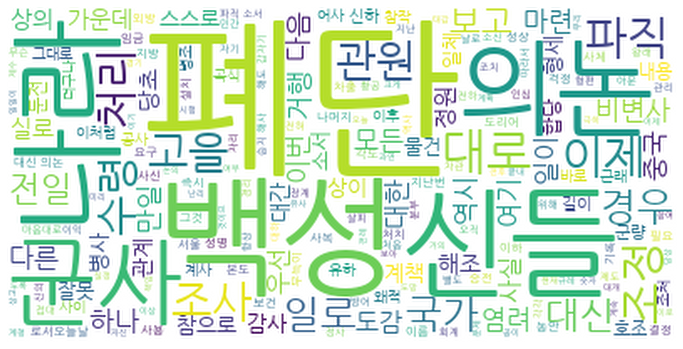

In [295]:
wordcloud = WordCloud(font_path='font/NanumGothic.ttf',stopwords=['다만','자가','조금','허락','윤허','전교','사람','생각','시행','마음'], background_color='white').generate(' '.join(p))
plt.figure(figsize=(12,12)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

In [296]:
# ##### from tensorflow.keras.models import Sequential
# t = Tokenizer()
# t.fit_on_texts([kingsays])
# vocab_size = len(t.word_index) + 1
# print('단어 집합의 크기 : %d' % vocab_size)

# sequences = list()
# for line in kingsays.split('.'): # W.을 기준으로 문장 토큰화
#     encoded = t.texts_to_sequences([line])[0]
#     for i in range(1, len(encoded)):
#         sequence = encoded[:i+1]
#         sequences.append(sequence)

# from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

# max_len=max(len(l) for l in sequences)

# sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
# sequences = np.array(sequences)
# X = sequences[:,:-1]
# y = sequences[:,-1]
# y = to_categorical(y, num_classes=vocab_size)

# model = Sequential()
# model.add(Embedding(vocab_size, 10, input_length=max_len-1)) # 레이블을 분리하였으므로 이제 X의 길이는 108
# model.add(SimpleRNN(max_len)) # 109 차원
# model.add(Dense(vocab_size, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X, y, epochs=50, verbose=2)

# def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
#     init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
#     sentence = ''
#     for _ in range(n): # n번 반복
#         encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
#         encoded = pad_sequences([encoded], maxlen=108, padding='pre') # 데이터에 대한 패딩
#         result = model.predict_classes(encoded, verbose=0)
#     # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
#         for word, index in t.word_index.items(): 
#             if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
#                 break # 해당 단어가 예측 단어이므로 break
#         current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
#         sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
#     # for문이므로 이 행동을 다시 반복
#     sentence = init_word + sentence
#     return sentence



In [ ]:
# for i in ['은','이','을']:
#     print(sentence_generation(model, t, '마음'+i, 108))